In [ ]:
import fileinput

import os
import shutil

import pandas as pd

def navigate_and_rename(src, newName):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        if os.path.isdir(s):
            navigate_and_rename(s, newName)
        elif s.endswith("add_macro_Americas_Appliances.py"):
            shutil.copy(s, os.path.join(src, newName))  
            
bu_region_total_sales_df = pd.read_csv('../data/bu_region_total_sales.csv')
bu_region_total_sales_df.drop(
    bu_region_total_sales_df.columns[0], axis=1)

df_dict = {}

for customer_region in bu_region_total_sales_df.customer_region.unique():
    for product_owning_business_unit_name in bu_region_total_sales_df.product_owning_business_unit_name.unique():
        if customer_region != 'Americas' and product_owning_business_unit_name != 'Appliances':
#             dir_src = os.curdir
#             navigate_and_rename(dir_src, 'add_macro_{0}_{1}.py'.format(customer_region, product_owning_business_unit_name))

#             with fileinput.FileInput('add_macro_{0}_{1}.py'.format(customer_region, product_owning_business_unit_name), inplace=True) as file:
#                 for line in file:
#                     print(line.replace('Americas', customer_region).replace('Appliances', product_owning_business_unit_name), end='')
            temp_master = distributor_sales_part_customer_df_joined[(distributor_sales_part_customer_df_joined['product_owning_business_unit_name'] == product_owning_business_unit_name) &
                   (distributor_sales_part_customer_df_joined['customer_region'] == customer_region) &
                                                 (distributor_sales_part_customer_df_joined[‘customer_distributor_indicator’] == 'Yes')]
            
            temp_master['fiscal_month'] = temp_master['fiscal_year_historical'].map(str) + '-' + temp_master['fiscal_month_historical'].map(str).apply(lambda x: x.zfill(2))
            
            temp_master = temp_master.sort_values(by='fiscal_month')
            temp_master['fiscal_month'] = temp_master['fiscal_month'].astype('datetime64[ns]')
            #X_train = X_train.set_index('fiscal_month')
            # X_train['fiscal_month'] = X_train['fiscal_month'].astype('datetime64[ns]')
            temp_master = temp_master[['sales_amount', 'fiscal_month']]
            
            temp_master = temp_master.groupby('fiscal_month').agg({'sales_amount':"sum"})
            temp_master = temp_master.reset_index()
            
            df_dict[customer_region + "_" + product_owning_business_unit_name] = temp_master

In [28]:
import pickle

with open('../data/timeseries', 'rb') as f:
    data = pickle.load(f)

In [29]:
import fileinput

import os
import shutil

import pandas as pd

def navigate_and_rename(src, newName):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        if os.path.isdir(s):
            navigate_and_rename(s, newName)
        elif s.endswith("add_macro_Americas_Appliances.py"):
            shutil.copy(s, os.path.join(src, newName))  
            
bu_region_total_sales_df = pd.read_csv('../data/bu_region_total_sales.csv')
bu_region_total_sales_df.drop(
    bu_region_total_sales_df.columns[0], axis=1)

for customer_region in bu_region_total_sales_df.customer_region.unique():
    for product_owning_business_unit_name in bu_region_total_sales_df.product_owning_business_unit_name.unique():
        if product_owning_business_unit_name in ['IND Systems', 'Appliances', 'Data and Devices', 'Automotive', 'IND Systems', 'A&D Connectors']:
#             dir_src = os.curdir
#             navigate_and_rename(dir_src, 'add_macro_{0}_{1}.py'.format(customer_region, product_owning_business_unit_name))

#             with fileinput.FileInput('add_macro_{0}_{1}.py'.format(customer_region, product_owning_business_unit_name), inplace=True) as file:
#                 for line in file:
#                     print(line.replace('Americas', customer_region).replace('Appliances', product_owning_business_unit_name), end='')
            temp_df = data[customer_region + "_" + product_owning_business_unit_name]
            print(temp_df.head(), customer_region, product_owning_business_unit_name)
#             model = ARIMA(temp_df['sales_amount'],order=(5,1,0))

#             model_fit = model.fit(disp=0)

#             dta = model_fit.forecast(steps=12)[0]

            X = temp_df['sales_amount'].values
            X = X.astype('float32')
            size = int(len(X))
            train, test = X[0:size], X[size:len(X)]
            model = ARIMA(train, order=(5,1,0))
            model_fit = model.fit(disp=False)
            
            dta = pd.DataFrame(model_fit.predict(len(X), len(X)+15, typ='levels'), columns=["sales_forecast"])
            dta.to_csv('../data/' + customer_region + "_" + product_owning_business_unit_name + ".csv", index=False)

  fiscal_month  sales_amount
0   2015-01-01  5.184399e+06
1   2015-02-01  6.638771e+06
2   2015-03-01  5.978877e+06
3   2015-04-01  5.001128e+06
4   2015-05-01  7.650173e+06 Americas A&D Connectors
  fiscal_month  sales_amount
0   2015-01-01  1.220810e+07
1   2015-02-01  1.481513e+07
2   2015-03-01  1.046601e+07
3   2015-04-01  1.153854e+07
4   2015-05-01  1.622584e+07 Americas Appliances
  fiscal_month  sales_amount
0   2015-01-01  3.614050e+06
1   2015-02-01  4.087920e+06
2   2015-03-01  3.228569e+06
3   2015-04-01  3.807325e+06
4   2015-05-01  4.948275e+06 Americas Automotive
  fiscal_month  sales_amount
0   2015-01-01  1.224151e+07
1   2015-02-01  1.474336e+07
2   2015-03-01  1.104293e+07
3   2015-04-01  1.206179e+07
4   2015-05-01  1.629403e+07 Americas Data and Devices
  fiscal_month  sales_amount
0   2015-01-01  9.906335e+06
1   2015-02-01  1.199347e+07
2   2015-03-01  8.930971e+06
3   2015-04-01  9.689381e+06
4   2015-05-01  1.312887e+07 Americas IND Systems
  fiscal_month  sal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

df_train = pd.read_csv('../data/us_apl_train_sample.csv')
df_train = df_train.drop(df_train.columns[0], axis=1)
print(df_train.shape)
df_train.head()



(245760, 37)


,fiscal_year_historical,fiscal_quarter_historical,fiscal_month_historical,sales_quantity,sales_amount,part_promote_indicator,tier2_distributor_classification_name,part_sales_status_name_GENERAL SALES,part_sales_status_name_INTERNAL SALES ONLY,part_sales_status_name_NO SALES,...,product_owning_segment_name_Communications Solutions,customer_country_code_AR,customer_country_code_BR,customer_country_code_CA,customer_country_code_CO,customer_country_code_MX,customer_country_code_US,customer_industry_business_code_label_level_1_Distribution Channel (071),customer_industry_label_level_1_Wholesale & Retail Trade (0551),customer_subcontractor_indicator_No
0,2017,1,2,200.0,68.000,1,3,1,0,0,...,1,0,0,0,0,0,1,1,1,1
1,2017,2,5,10.0,1.480,1,5,1,0,0,...,1,0,0,0,0,0,1,1,1,1
2,2017,2,6,154.0,14.938,1,3,1,0,0,...,1,0,0,0,0,0,1,1,1,1
3,2018,1,1,305.0,21.585,1,3,1,0,0,...,1,0,0,0,0,0,1,1,1,1
4,2015,4,11,20.0,2.380,1,5,1,0,0,...,1,0,0,0,0,0,1,1,1,1


In [2]:
df_test = pd.read_csv('../data/us_apl_test_sample.csv')
df_test = df_test.drop(df_test.columns[0],axis=1)

df_train.head()



,fiscal_year_historical,fiscal_quarter_historical,fiscal_month_historical,sales_quantity,sales_amount,part_promote_indicator,tier2_distributor_classification_name,part_sales_status_name_GENERAL SALES,part_sales_status_name_INTERNAL SALES ONLY,part_sales_status_name_NO SALES,...,product_owning_segment_name_Communications Solutions,customer_country_code_AR,customer_country_code_BR,customer_country_code_CA,customer_country_code_CO,customer_country_code_MX,customer_country_code_US,customer_industry_business_code_label_level_1_Distribution Channel (071),customer_industry_label_level_1_Wholesale & Retail Trade (0551),customer_subcontractor_indicator_No
0,2017,1,2,200.0,68.000,1,3,1,0,0,...,1,0,0,0,0,0,1,1,1,1
1,2017,2,5,10.0,1.480,1,5,1,0,0,...,1,0,0,0,0,0,1,1,1,1
2,2017,2,6,154.0,14.938,1,3,1,0,0,...,1,0,0,0,0,0,1,1,1,1
3,2018,1,1,305.0,21.585,1,3,1,0,0,...,1,0,0,0,0,0,1,1,1,1
4,2015,4,11,20.0,2.380,1,5,1,0,0,...,1,0,0,0,0,0,1,1,1,1


In [3]:
# need organizing 
df_train['fiscal_month'] = df_train['fiscal_year_historical'].map(str) + '-' + df_train['fiscal_month_historical'].map(str).apply(lambda x: x.zfill(2))
df_test['fiscal_month'] = df_test['fiscal_year_historical'].map(str) + '-' + df_test['fiscal_month_historical'].map(str).apply(lambda x: x.zfill(2))
df_train.head()





,fiscal_year_historical,fiscal_quarter_historical,fiscal_month_historical,sales_quantity,sales_amount,part_promote_indicator,tier2_distributor_classification_name,part_sales_status_name_GENERAL SALES,part_sales_status_name_INTERNAL SALES ONLY,part_sales_status_name_NO SALES,...,customer_country_code_AR,customer_country_code_BR,customer_country_code_CA,customer_country_code_CO,customer_country_code_MX,customer_country_code_US,customer_industry_business_code_label_level_1_Distribution Channel (071),customer_industry_label_level_1_Wholesale & Retail Trade (0551),customer_subcontractor_indicator_No,fiscal_month
0,2017,1,2,200.0,68.000,1,3,1,0,0,...,0,0,0,0,0,1,1,1,1,2017-02
1,2017,2,5,10.0,1.480,1,5,1,0,0,...,0,0,0,0,0,1,1,1,1,2017-05
2,2017,2,6,154.0,14.938,1,3,1,0,0,...,0,0,0,0,0,1,1,1,1,2017-06
3,2018,1,1,305.0,21.585,1,3,1,0,0,...,0,0,0,0,0,1,1,1,1,2018-01
4,2015,4,11,20.0,2.380,1,5,1,0,0,...,0,0,0,0,0,1,1,1,1,2015-11


In [4]:
X_train = df_train.sort_values(by='fiscal_month')
X_train['fiscal_month'] = X_train['fiscal_month'].astype('datetime64[ns]')
#X_train = X_train.set_index('fiscal_month')
# X_train['fiscal_month'] = X_train['fiscal_month'].astype('datetime64[ns]')
X_train = X_train[['sales_amount', 'fiscal_month']]
X_train.head()

,sales_amount,fiscal_month
47883,242.20,2015-01-01
231272,52.80,2015-01-01
62350,17.80,2015-01-01
40085,13.04,2015-01-01
174741,119.90,2015-01-01


In [5]:
X_train.shape
X_train = X_train.groupby('fiscal_month').agg({'sales_amount':"sum"})
X_train = X_train.reset_index()
X_train.head()

,fiscal_month,sales_amount
0,2015-01-01,1.441754e+06
1,2015-02-01,1.466871e+06
2,2015-03-01,1.083058e+06
3,2015-04-01,1.276545e+06
4,2015-05-01,1.565708e+06


In [6]:
X_train['sales_amount_differenced'] = np.log(X_train['sales_amount'])
X_train['rolling_mean'] = X_train['sales_amount_differenced'].rolling(window=12).mean()
X_train['df_log_minus_mean'] = X_train['sales_amount_differenced'] - X_train['rolling_mean']
X_train['df_log_minus_mean_dropna'] = X_train['df_log_minus_mean'].dropna(inplace=True)

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(X_train['sales_amount_differenced'],order=(5,1,0))

model_fit = model.fit(disp=0)

dta = model_fit.forecast(steps=12)[0]
dta = pd.DataFrame(dta, columns=["sales_forecast"])
dta

,sales_forecast
0,14.105479
1,14.292845
2,14.165171
3,14.067561
4,14.319080
5,14.215388
6,14.120403
7,14.282386
8,14.222825
9,14.112593


In [57]:
X_train

,fiscal_month,sales_amount,sales_amount_differenced,rolling_mean,df_log_minus_mean,df_log_minus_mean_dropna
0,2015-01-01,1.435674e+06,14.177145,NaN,NaN,None
1,2015-02-01,1.640855e+06,14.310728,NaN,NaN,None
2,2015-03-01,1.225491e+06,14.018852,NaN,NaN,None
3,2015-04-01,1.153223e+06,13.958071,NaN,NaN,None
4,2015-05-01,1.622942e+06,14.299751,NaN,NaN,None
5,2015-06-01,1.371650e+06,14.131525,NaN,NaN,None
6,2015-07-01,1.373906e+06,14.133168,NaN,NaN,None
7,2015-08-01,1.600339e+06,14.285726,NaN,NaN,None
8,2015-09-01,1.315562e+06,14.089774,NaN,NaN,None
9,2015-10-01,1.159306e+06,13.963332,NaN,NaN,None


                             ARIMA Model Results                              
Dep. Variable:         D.sales_amount   No. Observations:                   41
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -546.377
Method:                       css-mle   S.D. of innovations         141691.981
Date:                Wed, 06 Nov 2019   AIC                           1106.755
Time:                        23:29:25   BIC                           1118.750
Sample:                             1   HQIC                          1111.122
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1342.8059   6300.308      0.213      0.832    -1.1e+04    1.37e+04
ar.L1.D.sales_amount    -0.7768      0.141     -5.513      0.000      -1.053      -0.501
ar.L2.D.sale

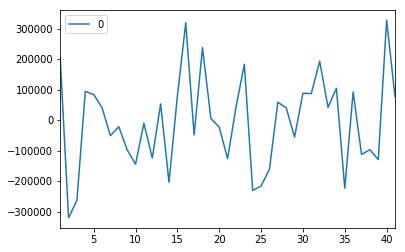

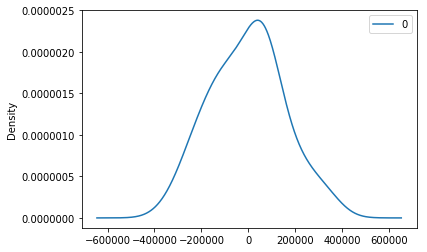

                   0
count      41.000000
mean    -5250.960898
std    154294.829196
min   -320975.574198
25%   -124411.331112
50%      5618.225800
75%     86785.100251
max    327377.358859


In [63]:
from matplotlib import pyplot

model = ARIMA(X_train['sales_amount'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=1106696.300105, expected=1178530.839200
predicted=1533733.264043, expected=1556835.628050
predicted=1319225.065939, expected=1313455.974930
predicted=1182228.804881, expected=1299111.357950
predicted=1474052.719824, expected=1586127.378420
predicted=1262600.392704, expected=1472502.152950
predicted=1322813.386996, expected=1325090.826820
predicted=1532704.890417, expected=1670125.734140
predicted=1472874.244224, expected=1207804.555890
predicted=1241050.774080, expected=1368725.881890
predicted=1626507.008167, expected=1483684.245300
predicted=1305206.762881, expected=1248229.137610
predicted=1360905.101323, expected=1205133.041780
predicted=1494059.539088, expected=1862465.742170
predicted=1303587.194110, expected=1406538.751250
Test MSE: 25046175950.118


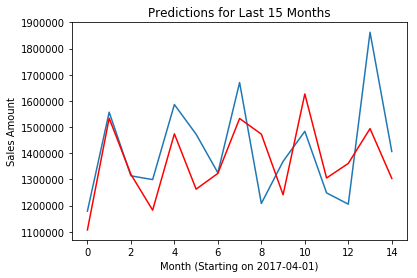

In [73]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = X_train['sales_amount'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Predictions for Last 15 Months')
pyplot.xlabel('Month (Starting on 2017-04-01)')
pyplot.ylabel('Sales Amount') 
pyplot.show()

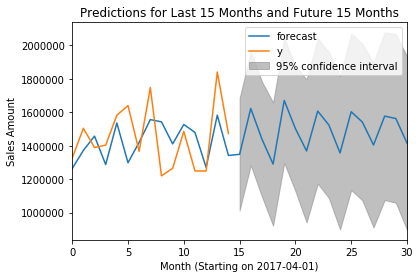

In [23]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
X = X_train['sales_amount'].values
X = X.astype('float32')
size = int(len(X))
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=False)
model_fit.plot_predict(len(train)-15, len(train)+15)# model_fit.predict(len(X), len(X)+15, typ='levels')
pyplot.title('Predictions for Last 15 Months and Future 15 Months')
pyplot.xlabel('Month (Starting on 2017-04-01)')
pyplot.ylabel('Sales Amount') 
pyplot.show()

In [31]:
model_fit.predict(len(X), len(X)+15, typ='levels')

array([915860.85696511, 974545.1235723 , 978017.41464132, 987254.05759621,
       985531.82480847, 999791.08539041, 983168.22467715, 990218.77588535,
       991435.48723156, 987414.56416341, 988966.82463504, 993194.2140874 ,
       989098.54175697, 991563.19842442, 993402.18284951, 991610.16827043])

In [18]:
X_train

,fiscal_month,sales_amount,sales_amount_differenced,rolling_mean,df_log_minus_mean,df_log_minus_mean_dropna
0,2015-01-01,1.441754e+06,14.181371,NaN,NaN,None
1,2015-02-01,1.466871e+06,14.198642,NaN,NaN,None
2,2015-03-01,1.083058e+06,13.895299,NaN,NaN,None
3,2015-04-01,1.276545e+06,14.059668,NaN,NaN,None
4,2015-05-01,1.565708e+06,14.263848,NaN,NaN,None
5,2015-06-01,1.312798e+06,14.087671,NaN,NaN,None
6,2015-07-01,1.377730e+06,14.135948,NaN,NaN,None
7,2015-08-01,1.606422e+06,14.289520,NaN,NaN,None
8,2015-09-01,1.275640e+06,14.058959,NaN,NaN,None
9,2015-10-01,1.110857e+06,13.920642,NaN,NaN,None


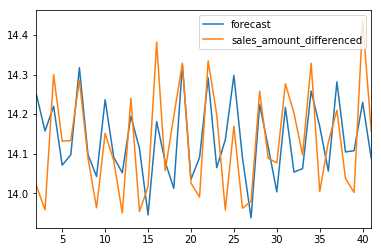

In [58]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
ax = dta.loc['1950':].plot(ax=ax)
res.plot_predict('1990', '2012', dynamic=True, ax=ax,
                 plot_insample=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters


df_train = us_apl_train
df_train = df_train.drop(df_train.columns[0],axis=1)

print(df_train.shape)

df_test = us_apl_test
df_test = df_test.drop(df_test.columns[0],axis=1)

df_train.head()

# need organizing 
df_train['fiscal_month'] = df_train['fiscal_year_historical'].map(str) + '-' + df_train['fiscal_month_historical'].map(str).apply(lambda x: x.zfill(2))
df_test['fiscal_month'] = df_test['fiscal_year_historical'].map(str) + '-' + df_test['fiscal_month_historical'].map(str).apply(lambda x: x.zfill(2))
df_train.head()

X_train = df_train.sort_values(by='fiscal_month')
#X_train['fiscal_month'] = X_train['fiscal_month'].astype('datetime64[ns]')
X_train = X_train.set_index('fiscal_month')
X_train['fiscal_month'] = X_train['fiscal_month'].astype('datetime64[ns]')
X_train = X_train['sales_amount']

X_train.shape
X_train = X_train.groupby('fiscal_month').agg({'sales_amount':"sum"})
X_train.head()

def plot_rolling(df):
  plt.plot(df, color = 'blue', label = 'Original')
  plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
  plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best', prop={'size': 6})
  plt.title('Rolling Mean & Rolling Standard Deviation')
  plt.show()

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best', prop={'size': 6})
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['sales_amount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
# exp decay
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)

def plot_decomp(df_log_shift,results):
  plt.plot(df_log_shift)
  plt.plot(results.fittedvalues, color='red')


from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(emea_series,order=(5,1,0))

model_fit = model.fit(disp=0)

model_fit.forecast(steps=15)[0].tolist()

#another verison 
X = us_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(12):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


In [ ]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

####################################################################################################
#########################           READ DATA SETS            ######################################
####################################################################################################
# Read original files
brent = pd.read_csv('data/macro/Brent_Oil-2.csv',index_col=0)
gold = pd.read_csv('data/macro/Gold_plot-2.csv',index_col=0)
palladium = pd.read_csv('data/macro/Palladium_plot-2.csv',index_col=0)
pmi = pd.read_csv('data/macro/PMI_plot-2.csv',index_col=0)
semi = pd.read_csv('data/macro/Semi_plot.csv',index_col=0)
usauto = pd.read_csv('data/macro/USAutoSale-2.csv',index_col=0)
sp500auto = pd.read_csv('data/macro/SP500AutoIndex_plot-2.csv',index_col=0)
cny = pd.read_csv('data/macro/cny.csv',index_col=0)
cny.rename(columns={"PX_LAST":"CNY"},inplace=True)

inv_level = pd.read_csv('data/internal/inventory_level.csv',index_col=0)
inv_level.rename(columns={'tyco_electronics_corp_part_nbr':'te_corporate_part_number',
                          'tyco_year_id':'fiscal_year_historical',
                          'Quarter':'fiscal_quarter_historical'},inplace=True)


# add paths
# internal data
dist_sales_path = "data/internal/distributor_sales.csv"
cma_path = "data/internal/cma.csv"
direct_sales_path = "data/internal/direct_sales.csv"
part_path = "data/internal/part.csv"
dist_inv_path = "data/internal/distributor_inventory.csv"
customer_path = "data/internal/new_customer.csv"
tariff_path = "data/internal/tariff.csv"

#  read individual datasets
dist_sales = pd.read_csv(dist_sales_path,index_col=0)
cma = pd.read_csv(cma_path,index_col=0)
direct_sales = pd.read_csv(direct_sales_path,index_col=0)
part = pd.read_csv(part_path,index_col=0)
dist_inv = pd.read_csv(dist_inv_path,index_col=0)
customer = pd.read_csv(customer_path,index_col=0)

external = pd.read_csv('data/External factor analysis v2.csv',index_col=0)

externel_keep_ls = [
  'fiscal_month_historical',
  'PMI_USA', 
  'PMI_China',
  'FX_DXY', 
  'FX_CNY',
  'Brent_spot',
  'Gold'
]

externel_df = external[externel_keep_ls]
externel_df = externel_df.reset_index()

# look at tariff
tariff = pd.read_csv(tariff_path,index_col=0)

# try to match tariff to part master
part_tariff = part.merge(tariff,how="inner",left_on="te_corporate_part_number",right_on="Part Number")

# join parts and dist sales
dist_sales_part_joined_df = dist_sales.merge(
    part, how='inner', on=['te_corporate_part_number'])

# join customer
distributor_sales_part_customer_df_joined = dist_sales_part_joined_df.merge(
    customer, how='inner',  left_on=['distributor_customer_id'], right_on=['customer_id'])

# select Americas and Appliances as 1st focus
temp_master = distributor_sales_part_customer_df_joined[(distributor_sales_part_customer_df_joined['product_owning_business_unit_name'] == 'Appliances') & 
                    (distributor_sales_part_customer_df_joined['customer_region'] == 'Americas') &
                                                  (distributor_sales_part_customer_df_joined['customer_distributor_indicator'] == 'Yes')]


keep_list = ['fiscal_year_historical',
       'fiscal_quarter_historical',
       'fiscal_month_historical',
       'sales_quantity',
       'sales_amount',
       'distributor_customer_id',
       'part_sales_status_name',
       'part_marketing_brand_name',
       'part_promote_indicator',
       'product_classification_name',
       'product_structure_label_level_1',
       'product_family_label_level_1',
       'product_owning_segment_name',
       'customer_country_code',
       'customer_industry_business_code_label_level_1',
       'customer_industry_label_level_1',
       'customer_subcontractor_indicator',
       'tier2_distributor_classification_name',
       'inventory_level']

temp_master = temp_master[keep_list].set_index('distributor_customer_id')


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dummy_columns = []  # array for multiple value columns

for column in ['part_sales_status_name',
               'part_marketing_brand_name',
               'product_classification_name',
               'product_structure_label_level_1',
               'product_family_label_level_1',
               'product_owning_segment_name',
               'customer_country_code',
               'customer_industry_business_code_label_level_1',
               'customer_industry_label_level_1',
               'customer_subcontractor_indicator'
               ]:
    if temp_master[column].dtype == object:
        if temp_master[column].nunique() == 2:
            # apply Label Encoder for binary ones
            temp_master[column] = le.fit_transform(temp_master[column])
        else:
            dummy_columns.append(column)
            

temp_master = pd.get_dummies(data=temp_master, columns=dummy_columns)

class_mapping_adp = {
  'High Service':5,
  'Gold':4,
  'Broadliner':3,
  'Silver':2,
  'Affiliate':1
}
# apply mapping method
temp_master['tier2_distributor_classification_name'] = temp_master['tier2_distributor_classification_name'].map(class_mapping_adp)

#########################################################################################################
######################################### Train/Test Data Split ######################################### 
########################################################################################################

# train test split; 2015-2018 Q1/Q2 for training, 2018 Q3/4 + 2019 for testing
# training
temp_master_train_2015 = temp_master[temp_master['fiscal_year_historical'] == 2015]
temp_master_train_2016 = temp_master[temp_master['fiscal_year_historical'] == 2016]
temp_master_train_2017 = temp_master[temp_master['fiscal_year_historical'] == 2017]
temp_master_train_2018 = temp_master[temp_master['fiscal_year_historical'] == 2018]
temp_master_train_2019 = temp_master[temp_master['fiscal_year_historical'] == 2019]
#us_apl_train_2018 = us_apl[(us_apl['fiscal_year_historical'] == 2018) & 
 #                   (us_apl['fiscal_quarter_historical'].isin([1,2]))]

# test data
temp_master_test_2019 = temp_master[temp_master['fiscal_year_historical'] == 2019]
temp_master_test_2018 = temp_master[(temp_master['fiscal_year_historical'] == 2018) & 
                    (temp_master['fiscal_quarter_historical'].isin([4]))]

#us_apl_test_2015 = us_apl[(us_apl['fiscal_year_historical'] == 2017) & 
  #                  (us_apl['fiscal_quarter_historical'].isin([2,3,4]))]

temp_master_train = pd.concat([temp_master_train_2015,
                          temp_master_train_2016, 
                          temp_master_train_2017,
                          temp_master_train_2018,
                          temp_master_train_2019],ignore_index=True)

temp_master_test = pd.concat([temp_master_test_2018,
                         temp_master_test_2019],ignore_index=True)


#us_apl_real_test = pd.concat([us_apl_test_2018,
  #                       us_apl_test_2019],ignore_index=True)

######################################################################################################
#############################################  Modeling  #############################################
######################################################################################################

y_train = temp_master_train['sales_amount']
X_train = temp_master_train.drop('sales_amount',axis=1)

clf_xg = xgb.XGBRegressor(random_state=42)

clf_rf = RandomForestRegressor(random_state=42)

clf_xg.fit(X_train,y_train)
clf_rf.fit(X_train,y_train)

y_test = temp_master_test['sales_amount']
X_test = temp_master_test.drop('sales_amount',axis=1)

clf_xg_hat = clf_xg.predict(X_test).tolist()
clf_rf_hat = clf_rf.predict(X_test).tolist()


#new df 
X_test['sales_amount'] = y_test
X_test['predicted_sales'] = clf_xg_hat


results = X_test[['fiscal_year_historical','fiscal_quarter_historical',
                'sales_amount','predicted_sales']]

results = results.sort_values(['fiscal_year_historical', 'fiscal_quarter_historical'], ascending=True).reset_index()

results1 = results[results['fiscal_year_historical'] == 2018]
results1.groupby(['fiscal_quarter_historical']).agg({'predicted_sales': 'sum'})

results2 = results[results['fiscal_year_historical'] == 2019]
results2.groupby(['fiscal_quarter_historical']).agg({'predicted_sales': 'sum'})

#new df 
X_test['sales_amount'] = y_test
X_test['predicted_sales'] = clf_rf_hat

results = X_test[['fiscal_year_historical','fiscal_quarter_historical',
                'sales_amount','predicted_sales']]

results = results.sort_values(['fiscal_year_historical', 'fiscal_quarter_historical'], ascending=True).reset_index()

results1 = results[results['fiscal_year_historical'] == 2018]
results1.groupby(['fiscal_quarter_historical']).agg({'predicted_sales': 'sum'})

results2 = results[results['fiscal_year_historical'] == 2019]
results2.groupby(['fiscal_quarter_historical']).agg({'predicted_sales': 'sum'})



from xgboost import plot_importance
plot_importance(clf_xg)
plt.show()
